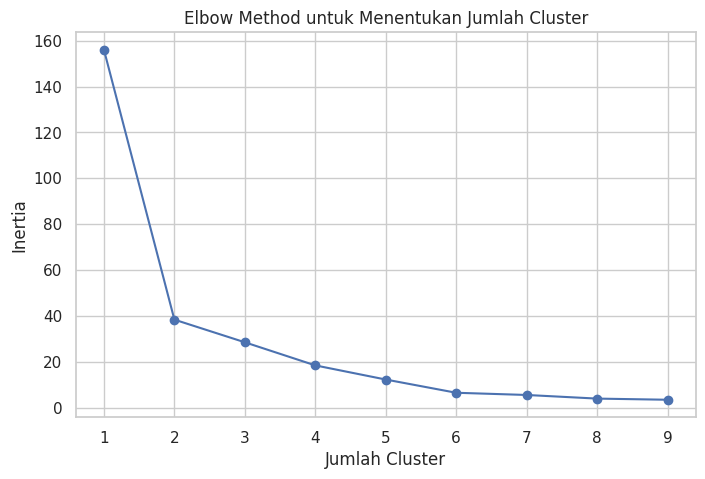

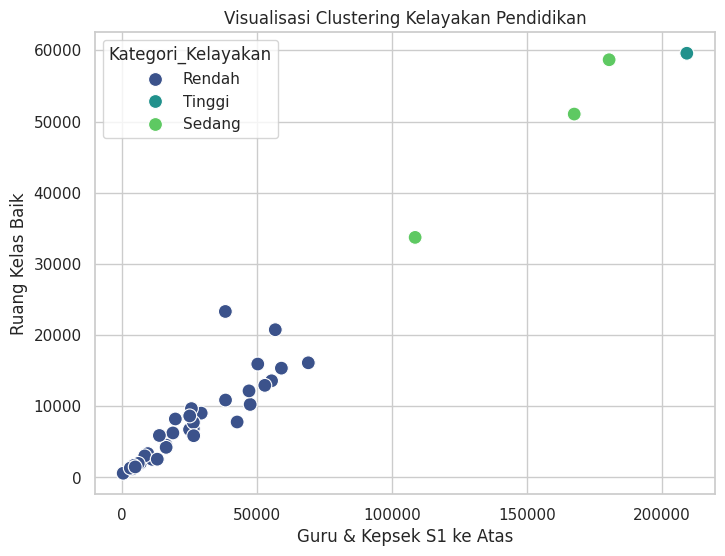

/tmp/ipython-input-2953592757.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


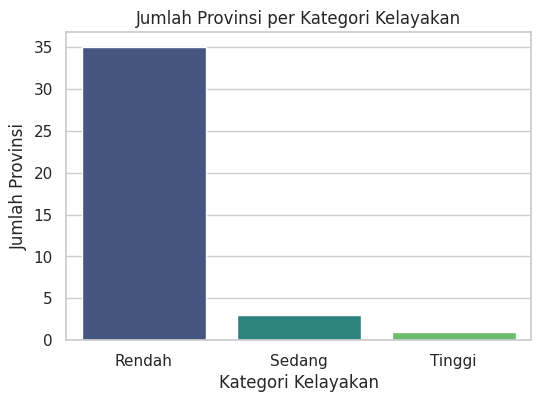

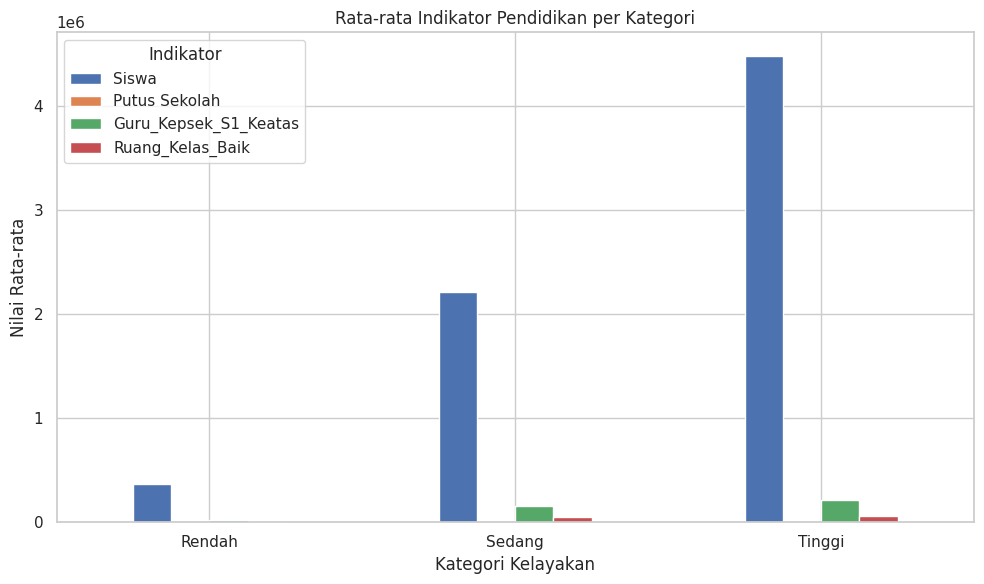

                           Provinsi  Cluster Kategori_Kelayakan
0              Prov. D.K.I. Jakarta        0             Rendah
1                  Prov. Jawa Barat        2             Tinggi
2                 Prov. Jawa Tengah        1             Sedang
3             Prov. D.I. Yogyakarta        0             Rendah
4                  Prov. Jawa Timur        1             Sedang
5                        Prov. Aceh        0             Rendah
6              Prov. Sumatera Utara        1             Sedang
7              Prov. Sumatera Barat        0             Rendah
8                        Prov. Riau        0             Rendah
9                       Prov. Jambi        0             Rendah
10           Prov. Sumatera Selatan        0             Rendah
11                    Prov. Lampung        0             Rendah
12           Prov. Kalimantan Barat        0             Rendah
13          Prov. Kalimantan Tengah        0             Rendah
14         Prov. Kalimantan Selatan     

In [9]:
# ==============================
# 1. IMPORT LIBRARY
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ==============================
# 2. SETTING TAMPILAN
# ==============================
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# ==============================
# 3. LOAD DATASET
# ==============================
df = pd.read_excel("kelayakan-pendidikan-indonesia-cleaned.xlsx")

# ==============================
# 4. PILIH FITUR NUMERIK
# ==============================
fitur = [
    "Siswa",
    "Putus Sekolah",
    "Guru_Kepsek_S1_Keatas",
    "Ruang_Kelas_Baik"
]

X = df[fitur]

# ==============================
# 5. STANDARDISASI DATA
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6. ELBOW METHOD (VISUALISASI)
# ==============================
inertia = []

for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.show()

# ==============================
# 7. K-MEANS CLUSTERING
# ==============================
kmeans = KMeans(
    n_clusters=3,
    random_state=42
)

df["Cluster"] = kmeans.fit_predict(X_scaled)

# ==============================
# 8. MENENTUKAN LABEL CLUSTER
# ==============================
cluster_mean = df.groupby("Cluster")[fitur].mean()

# Balik variabel negatif
cluster_mean["Putus Sekolah"] *= -1

# Skor total
cluster_mean["Total_Score"] = cluster_mean.mean(axis=1)

# Urutkan
cluster_mean = cluster_mean.sort_values("Total_Score")

label_mapping = {
    cluster_mean.index[0]: "Rendah",
    cluster_mean.index[1]: "Sedang",
    cluster_mean.index[2]: "Tinggi"
}

df["Kategori_Kelayakan"] = df["Cluster"].map(label_mapping)

# ==============================
# 9. VISUALISASI SCATTER CLUSTER
# ==============================
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Guru_Kepsek_S1_Keatas",
    y="Ruang_Kelas_Baik",
    hue="Kategori_Kelayakan",
    palette="viridis",
    s=100
)
plt.title("Visualisasi Clustering Kelayakan Pendidikan")
plt.xlabel("Guru & Kepsek S1 ke Atas")
plt.ylabel("Ruang Kelas Baik")
plt.show()

# ==============================
# 10. JUMLAH PROVINSI PER KATEGORI
# ==============================
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x="Kategori_Kelayakan",
    order=["Rendah", "Sedang", "Tinggi"],
    palette="viridis"
)
plt.title("Jumlah Provinsi per Kategori Kelayakan")
plt.xlabel("Kategori Kelayakan")
plt.ylabel("Jumlah Provinsi")
plt.show()

# ==============================
# 11. RATA-RATA INDIKATOR TIAP KATEGORI
# ==============================
ringkasan = (
    df.groupby("Kategori_Kelayakan")[fitur]
      .mean()
      .reindex(["Rendah", "Sedang", "Tinggi"])
)

ringkasan.plot(
    kind="bar",
    figsize=(10, 6)
)

plt.title("Rata-rata Indikator Pendidikan per Kategori")
plt.xlabel("Kategori Kelayakan")
plt.ylabel("Nilai Rata-rata")
plt.xticks(rotation=0)
plt.legend(title="Indikator")
plt.tight_layout()
plt.show()

# ==============================
# 12. TAMPILKAN DATA AKHIR
# ==============================
hasil_akhir = df[["Provinsi", "Cluster", "Kategori_Kelayakan"]]
print(hasil_akhir)

